In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data.shape

(158, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
data.drop(['Country','Dystopia Residual'],axis=1,inplace=True)

In [7]:
data.shape

(158, 10)

In [8]:
data.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
data['Region'].nunique()

10

In [10]:
data['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

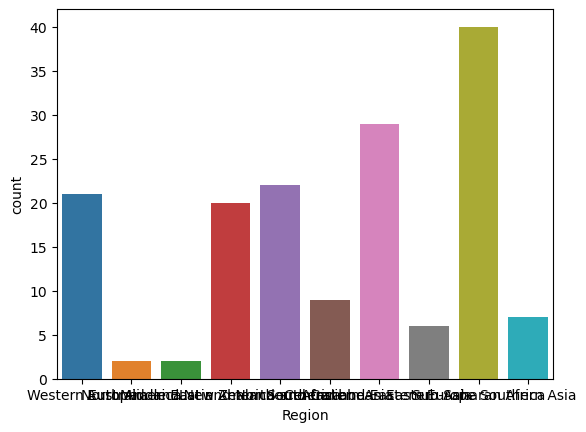

In [11]:
sns.countplot(x=data['Region'])

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
data['Region'] = le.fit_transform(data['Region'])

In [15]:
data.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [16]:
data.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

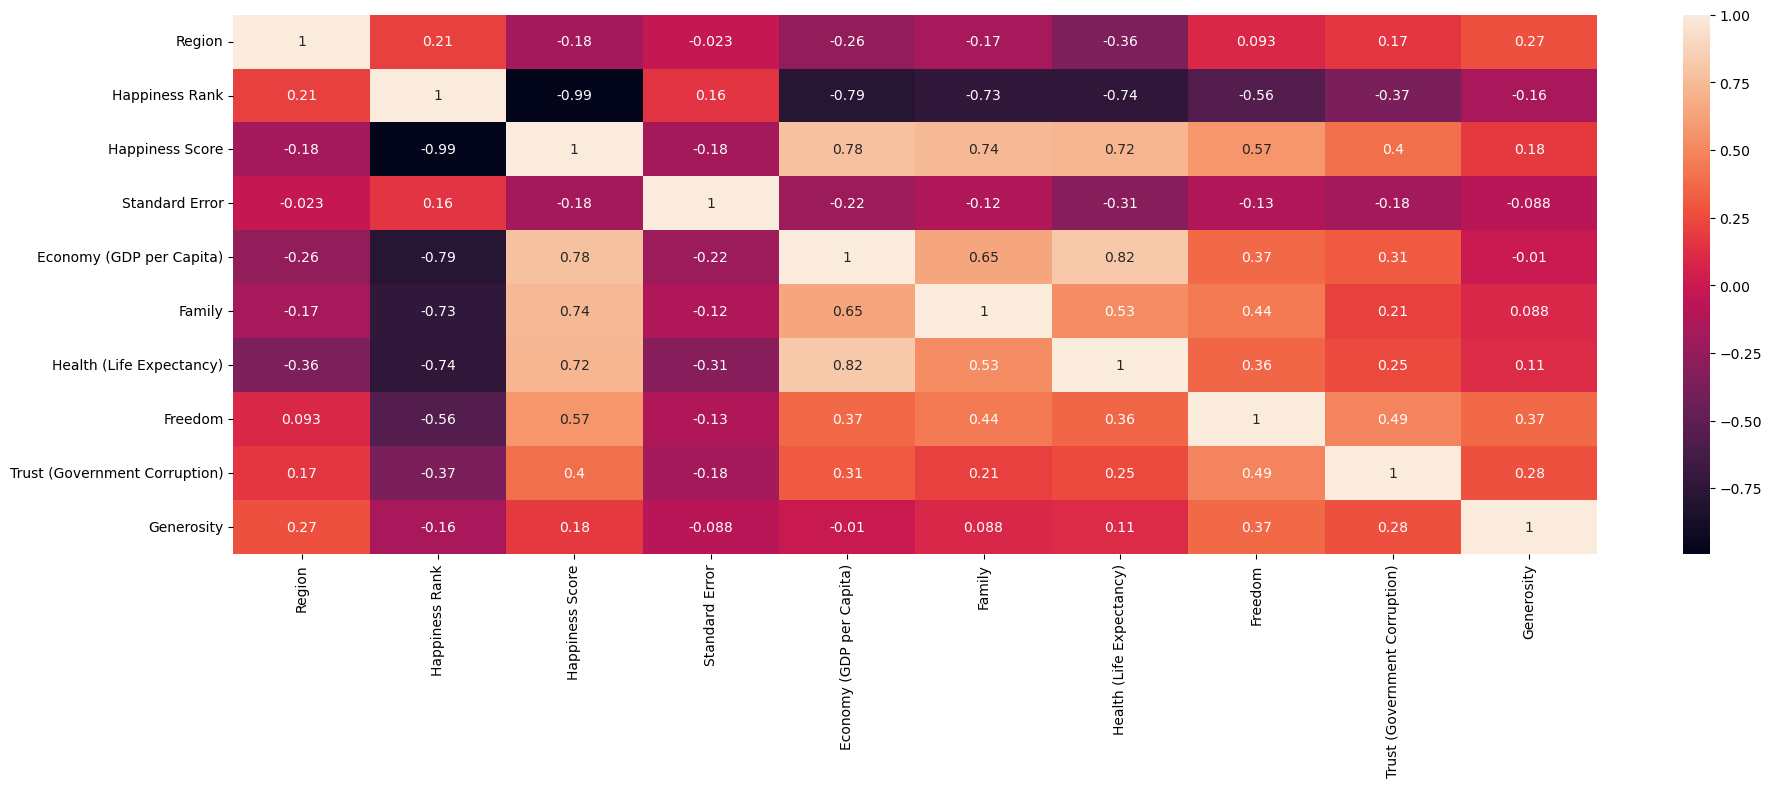

In [17]:
plt.figure(figsize=(22,7))

sns.heatmap(data.corr(),annot=True)

plt.show()

In [18]:
cat_data = data[['Region','Happiness Rank']]

In [19]:
cont_data = data.select_dtypes('float64').columns.tolist()

In [20]:
cont_data

['Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity']

In [21]:
cont_data = cont_data[1:]

In [22]:
cont_data

['Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity']

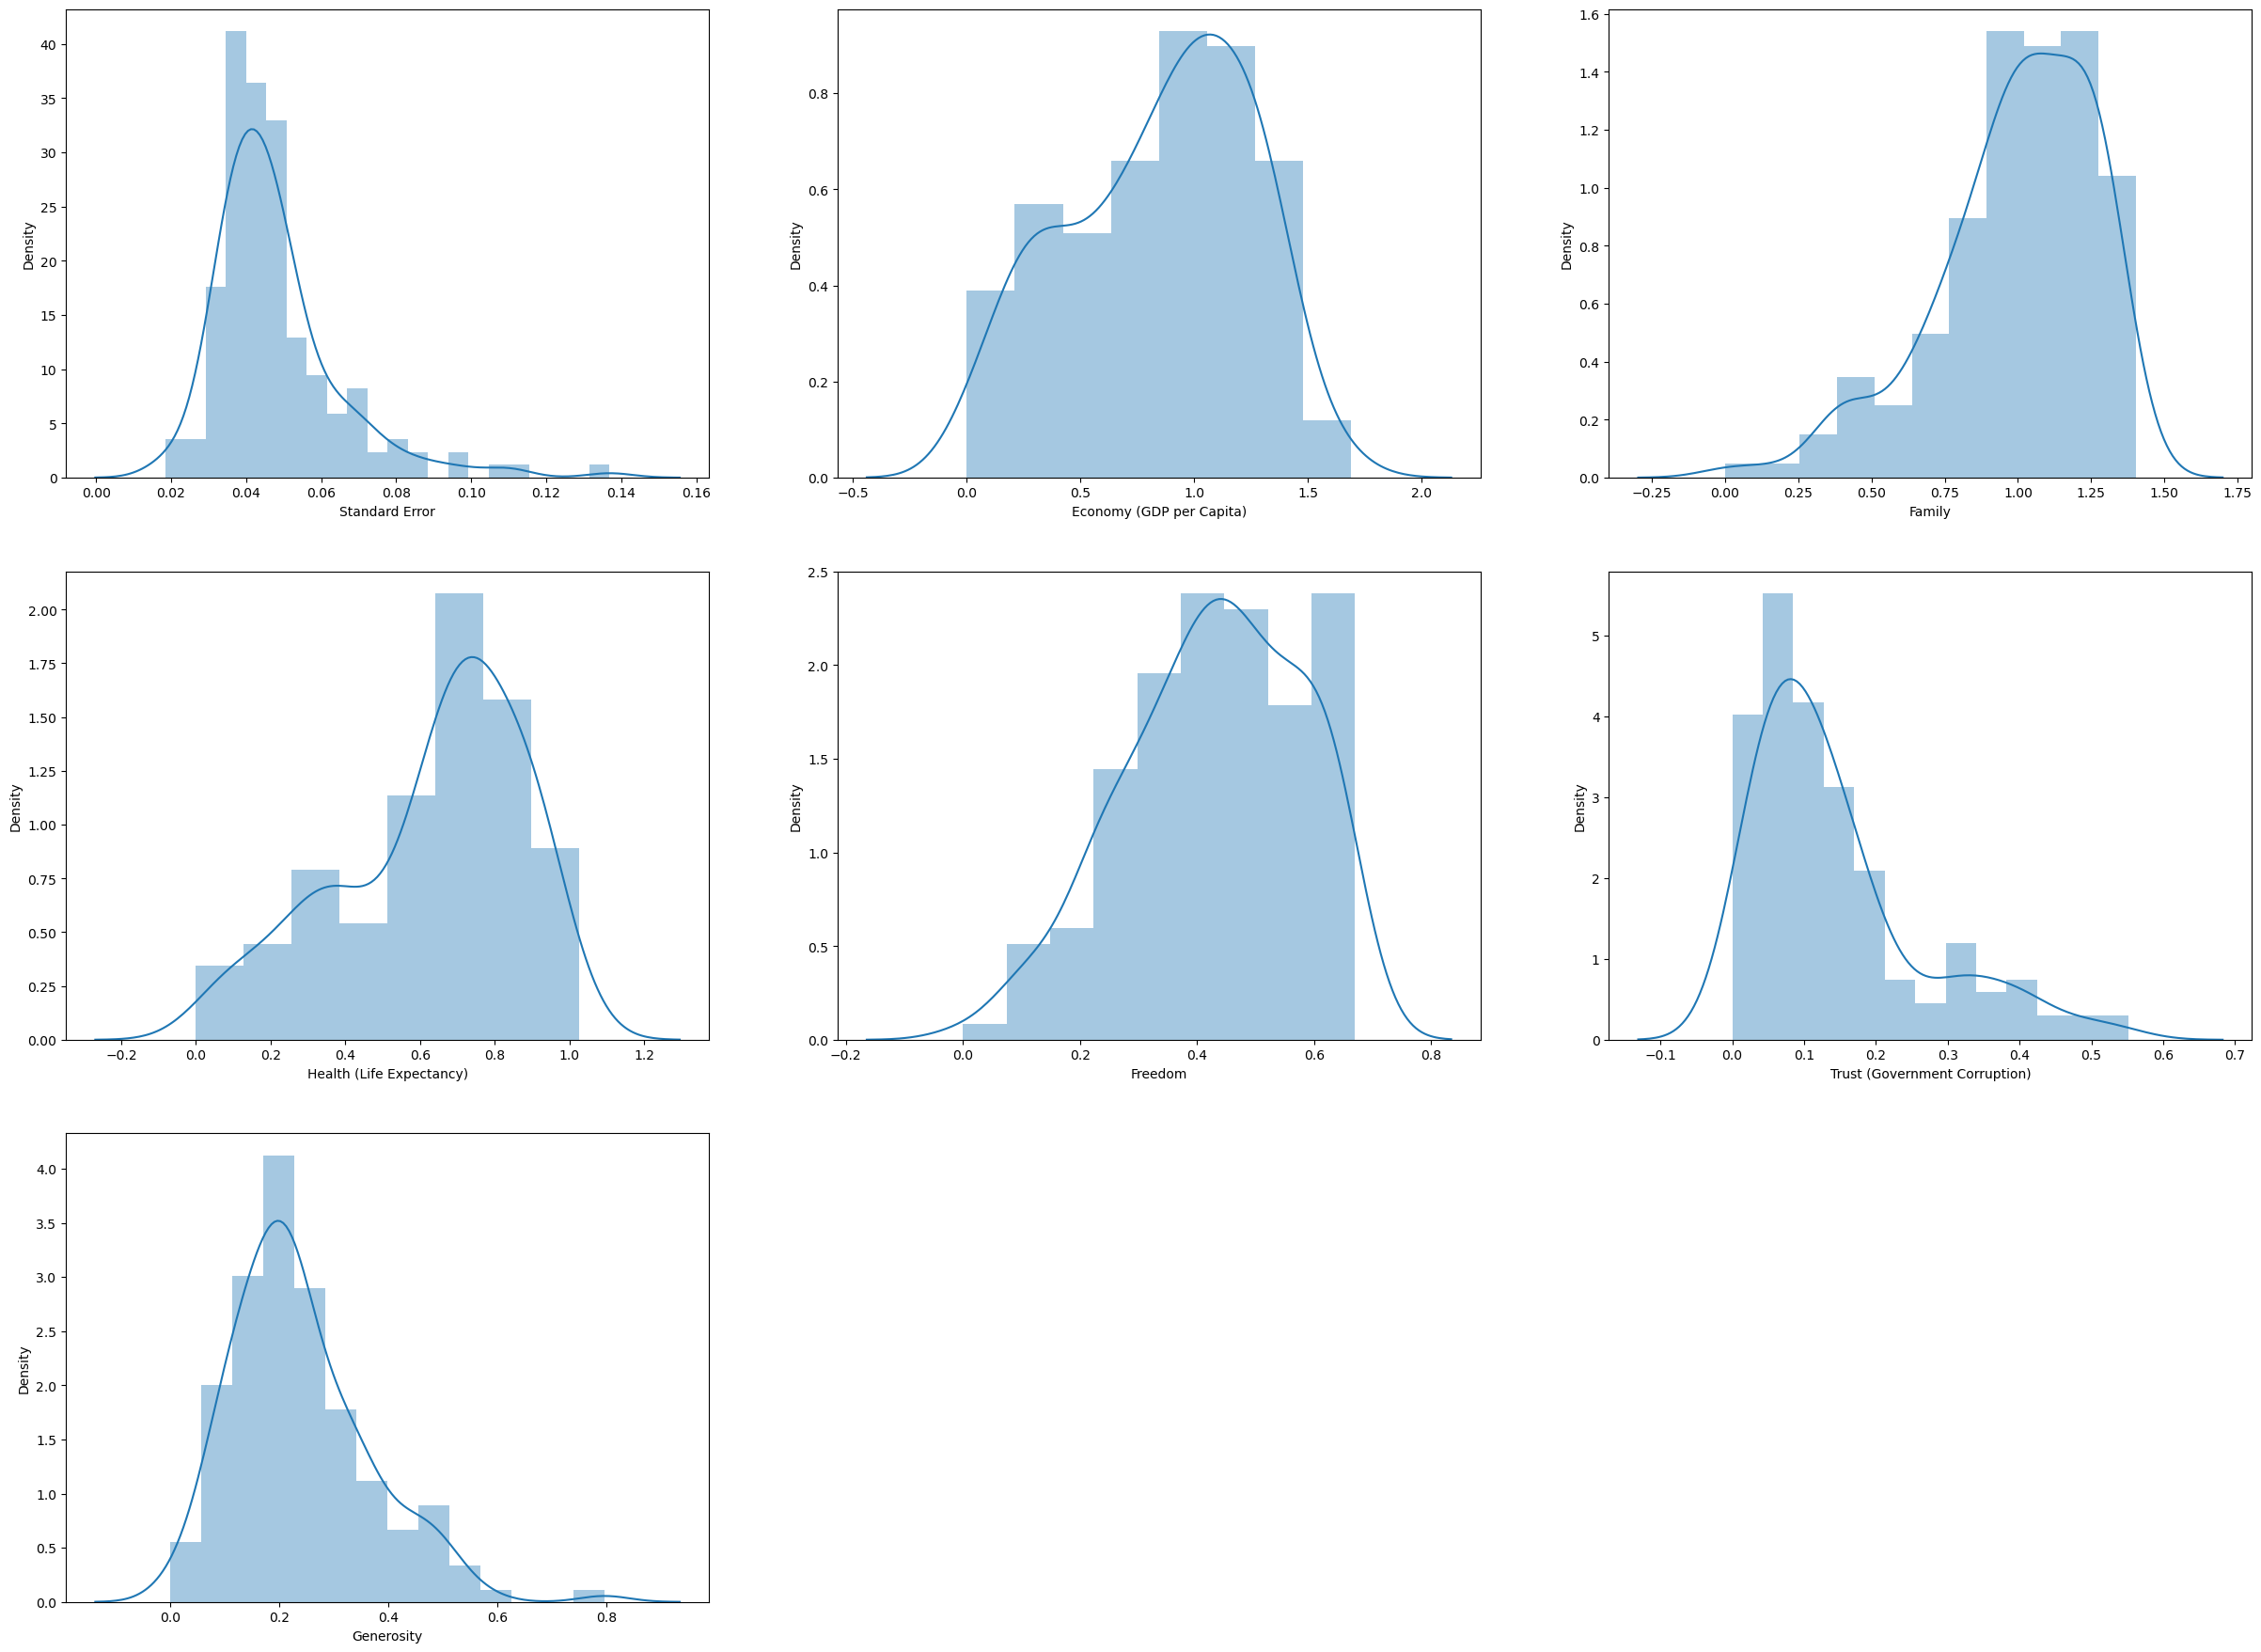

In [23]:
plt.figure(figsize=(30,22))

plotnumber=1

for column in data[cont_data]:
    if plotnumber <=7:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[cont_data][column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [25]:
data.skew().sort_values()

Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Economy (GDP per Capita)        -0.317575
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Standard Error                   1.983439
dtype: float64

In [27]:
from sklearn.preprocessing import PowerTransformer

In [28]:
pt = PowerTransformer()

In [29]:
data[cont_data] = pt.fit_transform(data[cont_data])

In [30]:
data.skew().sort_values()

Health (Life Expectancy)        -0.183181
Family                          -0.169651
Economy (GDP per Capita)        -0.127233
Region                          -0.116119
Freedom                         -0.080728
Standard Error                  -0.020092
Happiness Rank                   0.000418
Generosity                       0.013320
Happiness Score                  0.097769
Trust (Government Corruption)    0.185965
dtype: float64

In [31]:
data.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,9,1,7.587,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391
1,9,2,7.561,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995
2,9,3,7.527,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973
3,9,4,7.522,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080
4,5,5,7.427,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224


In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [33]:
x = data.drop('Happiness Score',axis=1)

y = data['Happiness Score']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=6)

# LR

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
pred1 = lr.predict(x_train)

In [38]:
pred2 = lr.predict(x_test)

In [39]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9859763970439819


In [40]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9871841353565227


In [44]:
from sklearn.linear_model import Lasso,Ridge

# LASSO

In [54]:
ls = Lasso()

In [55]:
ls.fit(x_train,y_train)

Lasso()

In [56]:
pred1 = ls.predict(x_train)

In [57]:
pred2 = ls.predict(x_test)

In [58]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9837458408191596


In [59]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9848979097376847


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
para = {'alpha':np.arange(0.001,1,0.01),
       'selection':['cyclic', 'random'],
       'max_iter':range(1000,10000,1000)}

In [51]:
clf = GridSearchCV(ls,para,n_jobs=1)

In [52]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(), n_jobs=1,
             param_grid={'alpha': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0....531,
       0.541, 0.551, 0.561, 0.571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
                         'max_iter': range(1000, 10000, 1000),
                         'selection': ['cyclic', 'random']})

In [53]:
clf.best_params_

{'alpha': 0.030999999999999996, 'max_iter': 9000, 'selection': 'random'}

In [60]:
clf.best_estimator_.fit(x_train,y_train)

Lasso(alpha=0.030999999999999996, max_iter=9000, selection='random')

In [61]:
pred1 = clf.best_estimator_.predict(x_train)

In [62]:
pred2 = clf.best_estimator_.predict(x_test)

In [63]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9848486194391566


In [64]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9870601456459347


# RIDGE

In [65]:
ri = Ridge()

In [66]:
ri.fit(x_train,y_train)

Ridge()

In [67]:
pred1 = ri.predict(x_train)

In [68]:
pred2 = ri.predict(x_test)

In [69]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9859761756836068


In [70]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9871998853998197


In [71]:
para = {'alpha':np.arange(1,10,0.1),
       'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}

In [72]:
clf = GridSearchCV(ri,para,n_jobs=1)

In [73]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(), n_jobs=1,
             param_grid={'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [74]:
clf.best_params_

{'alpha': 9.900000000000007, 'solver': 'saga'}

In [75]:
clf.best_estimator_.fit(x_train,y_train)

Ridge(alpha=9.900000000000007, solver='saga')

In [76]:
pred1 = clf.best_estimator_.predict(x_train)

In [77]:
pred2 = clf.best_estimator_.predict(x_test)

In [78]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9859593741693236


In [79]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9873095470285159


# KNN

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
knn = KNeighborsRegressor()

In [82]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [83]:
pred1 = knn.predict(x_train)

In [84]:
pred2 = knn.predict(x_test)

In [85]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9978901218689326


In [86]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9981288979403254


# TREE

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
dt = DecisionTreeRegressor()

In [90]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [91]:
pred1 = dt.predict(x_train)

In [92]:
pred2 = dt.predict(x_test)

In [93]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 1.0


In [94]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9932802237975161


# Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rf = RandomForestRegressor()

In [97]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
pred1 = rf.predict(x_train)

In [99]:
pred2 = rf.predict(x_test)

In [100]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.999404285595039


In [101]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9987868607329731


# ada

In [102]:
from sklearn.ensemble import AdaBoostRegressor

In [103]:
ada = AdaBoostRegressor()

In [104]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [105]:
pred1 = ada.predict(x_train)

In [106]:
pred2 = ada.predict(x_test)

In [107]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9981015957910421


In [108]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9976184392940698


# GBDT

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
gb = GradientBoostingRegressor()

In [112]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [113]:
pred1 = gb.predict(x_train)

In [114]:
pred2 = gb.predict(x_test)

In [115]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9999985775309462


In [116]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9988913353529394


# xgboost

In [119]:
from xgboost import XGBRegressor

In [120]:
xg = XGBRegressor()

In [121]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [124]:
pred1 = xg.predict(x_train)

In [125]:
pred2 = xg.predict(x_test)

In [126]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9999996060484128


In [127]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9930633861770777


# from all the above models KNN is the best model

In [128]:
knn = KNeighborsRegressor()

In [129]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [131]:
pred1 = knn.predict(x_train)

In [133]:
pred2 = knn.predict(x_test)

In [134]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [135]:
para = {'n_neighbors':[5,6,7],
       'weights':['uniform', 'distance'],
       'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
       'leaf_size':range(30,40,1)}

In [136]:
clf = GridSearchCV(knn,para,n_jobs=1)

In [137]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(30, 40), 'n_neighbors': [5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [139]:
clf.best_params_

{'algorithm': 'brute',
 'leaf_size': 30,
 'n_neighbors': 5,
 'weights': 'distance'}

In [140]:
clf.best_estimator_.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', weights='distance')

In [142]:
pred1 = clf.best_estimator_.predict(x_train)

In [143]:
pred2 = clf.best_estimator_.predict(x_test)

In [144]:
print(f"Trainning Accuracy {r2_score(y_train,pred1)}")

Trainning Accuracy 0.9999999999999998


In [145]:
print(f"Test Accuracy {r2_score(y_test,pred2)}")

Test Accuracy 0.9987474958583076


# CONCLUSION

In [146]:
conc = pd.DataFrame({'Actual':y_test,"Predicted":pred2})

In [147]:
conc

,Actual,Predicted
6,7.378,7.404973
2,7.527,7.479455
108,4.694,4.694975
88,5.098,5.079218
52,5.878,5.881125
107,4.715,4.741895
4,7.427,7.435610
0,7.587,7.478907
84,5.129,5.125681
39,6.269,6.150694
